In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

2025-04-18 02:58:20.960829: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744945101.150584      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744945101.202203      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#read dataset ----> train, test
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [3]:
#image classes
image_classes = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/train')
print(image_classes)

['Normal', 'Viral Pneumonia', 'Covid']


In [4]:
def plot_image(image_classes):
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1, 3, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

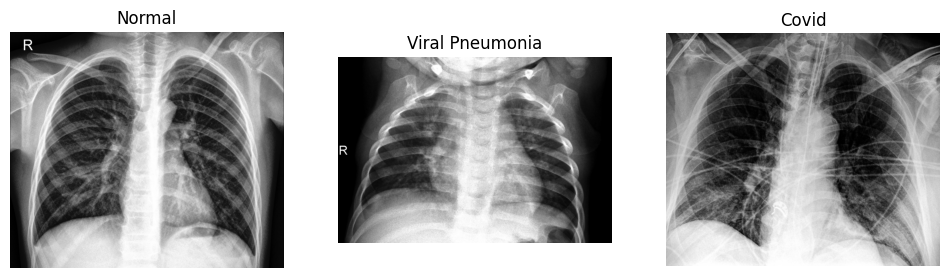

In [5]:
plot_image(image_classes)

# image preprocessing


In [6]:
data_generator = ImageDataGenerator(rescale = 1/255)

In [7]:
#train data generator
train_data = data_generator.flow_from_directory(train_path,
                                                target_size = (224, 224),
                                                batch_size = 16
                                               )

Found 251 images belonging to 3 classes.


In [8]:
#test data generator
test_data = data_generator.flow_from_directory(test_path,
                                              target_size = (224, 224),
                                              batch_size = 1)

Found 66 images belonging to 3 classes.


# using CNN

In [9]:
#CNN Model 
model = Sequential()

#add conv layer with filters, kernel , padding, activation, input shape
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                activation = 'relu', input_shape = [224, 224, 3]))

#add pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#add conv layer with filters, kernel , padding, activation, input shape
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                activation = 'relu'))

#add pooling layer
model.add(MaxPooling2D())

#add conv layer with filters, kernel , padding, activation, input shape
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                activation = 'relu'))

#add pooling layer
model.add(MaxPooling2D())

#add Flatten Layer ----> 1D
model.add(Flatten())

#add fully connected layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

#add output layer
model.add(Dense(3, activation = 'softmax'))

I0000 00:00:1744945115.522969      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,955,331 (49.42 MB)

 Trainable params: 12,955,331 (49.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#compile model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
             )

In [12]:
#fit model 
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_history=model.fit(train_data, epochs=20, validation_data=test_data, callbacks=[early_stop])


Epoch 1/20


I0000 00:00:1744945124.421282     110 service.cc:148] XLA service 0x7b01a8004b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744945124.421992     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744945124.752543     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/16 ━━━━━━━━━━━━━━━━━━━━ 2:29 10s/step - accuracy: 0.5000 - loss: 1.0914

I0000 00:00:1744945127.733685     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 440ms/step - accuracy: 0.5413 - loss: 1.1221 - val_accuracy: 0.7727 - val_loss: 0.6214
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.8582 - loss: 0.3605 - val_accuracy: 0.8636 - val_loss: 0.4395
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - accuracy: 0.9554 - loss: 0.1524 - val_accuracy: 0.8788 - val_loss: 0.2429
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.9623 - loss: 0.0874 - val_accuracy: 0.9242 - val_loss: 0.2319
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.9962 - loss: 0.0545 - val_accuracy: 0.8939 - val_loss: 0.2604
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.9963 - loss: 0.0158 - val_accuracy: 0.9091 - val_loss: 0.5210
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.9993 - loss: 0.0125 - val_accuracy: 0.8788 - val_loss: 0.4051


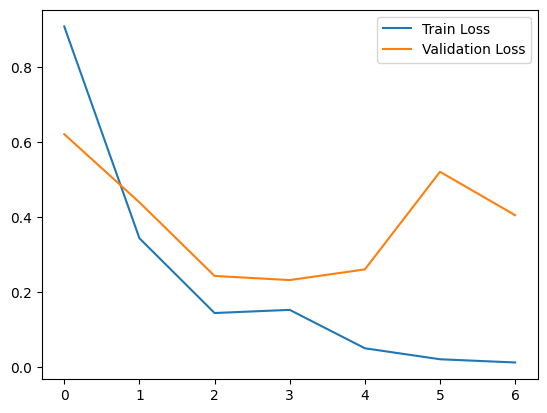

In [13]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

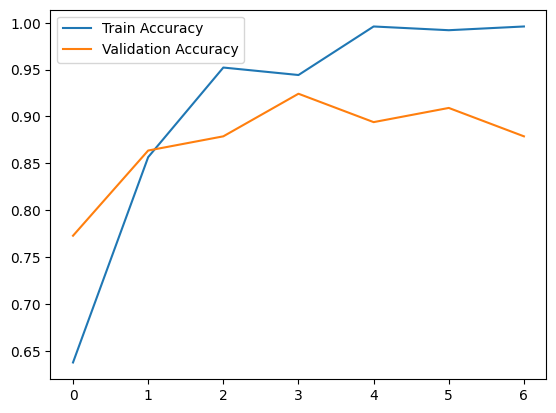

In [14]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [15]:
model.evaluate(test_data)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9291 - loss: 0.2305


[0.23187707364559174, 0.9242424368858337]

In [21]:
#save model
model.save('covid19_model.h5')

In [17]:
class_map = dict([value, key] for key, value in train_data.class_indices.items())

In [18]:
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [19]:
import numpy as np
def prediction(test_image, actual_label):
    #load & Preprocessing image
    testing_img = image.load_img(test_image, target_size = (224,224))
    test_img_array = image.img_to_array(testing_img) / 255
    
    test_img_input = test_img_array.reshape(1, test_img_array.shape[0],
                                           test_img_array.shape[1],
                                           test_img_array.shape[2])
    
    #make prediction
    predicted_class = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_class]
    
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_array)
    plt.title('Actual Label : {}, Predicted Label : {}'.format(actual_label, predicted_img))
    
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


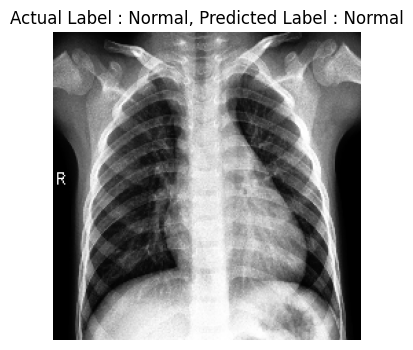

In [20]:
test_image = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0112.jpeg'
prediction(test_image, actual_label = 'Normal')

# deployment using streamlit (local)

In [22]:
%%writefile covid_19.py

import streamlit as st
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from PIL import Image

st.title('Covid-19 Classification Application')

st.write('Covid-19 Prediction')

model = load_model("/kaggle/working/covid19_model.h5")

#upload an image
uploaded_image = st.file_uploader("Upload an Image", type = ['jpg', 'png', 'jpeg'])


if uploaded_image is not None:
    img = Image.open(uploaded_image) #open the image
    st.image(img, caption = 'Uploaded Image..') #show image on streamlit
    
    #1- Convert image to array
    new_image = np.array(img)
    
    #2- resize image to be 224 * 224 
    new_image = cv2.resize(new_image, (224,224))
    
    #3- convert image to gray scale
    if new_image.ndim == 2:
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
        
    #4- normalize image
    new_image = new_image.astype('float32') / 255.0
    
    #5- reshape image to match the model input shape
    new_image = new_image.reshape(1, 224,224,3)
    
    #make prediction
    prediction = model.predict(new_image)
    predicted_class = np.argmax(prediction, axis =1)
    
    st.write(f'predicted_class Digit :{predicted_class[0]}')

Writing covid_19.py


# using MobileNetV2 Transfer Learning 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

2025-04-18 04:42:19.037943: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744951339.228842      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744951339.281993      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
IMG_SIZE = (224, 224) 
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)


In [3]:
train_dir = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_dir = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [4]:
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(3, activation='softmax')  
])

I0000 00:00:1744951406.631416      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stop]
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744951463.322494     104 service.cc:148] XLA service 0x796548043000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744951463.323212     104 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744951464.150001     104 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/8 ━━━━━━━━━━━━━━━━━━━━ 2:18 20s/step - accuracy: 0.3704 - loss: 1.2751

I0000 00:00:1744951467.791204     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.4841 - loss: 1.1239 - val_accuracy: 0.7273 - val_loss: 0.5628
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.7823 - loss: 0.4858 - val_accuracy: 0.8030 - val_loss: 0.4321
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.8361 - loss: 0.3854 - val_accuracy: 0.8939 - val_loss: 0.2971
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.8717 - loss: 0.3788 - val_accuracy: 0.9091 - val_loss: 0.2524
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9042 - loss: 0.3138 - val_accuracy: 0.8636 - val_loss: 0.2978
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9401 - loss: 0.1856 - val_accuracy: 0.9242 - val_loss: 0.2259
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.9382 - loss: 0.2127 - val_accuracy: 0.8788 - val_loss: 0.2682
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.9229 - loss: 0.1829 - val_accuracy: 0.9242 - val_loss: 0.2109
Epoch

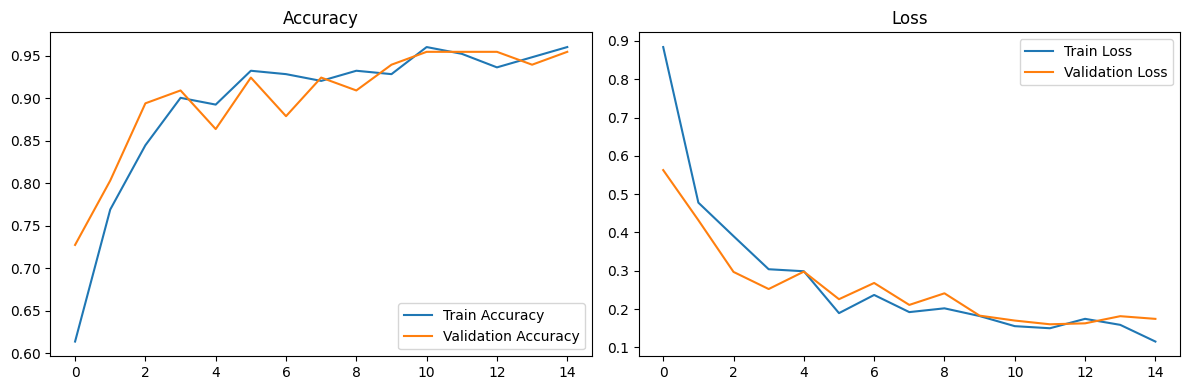

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


In [8]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Final Test Accuracy with MobileNetV2: {test_acc:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9656 - loss: 0.1557
Final Test Accuracy with MobileNetV2: 0.95


In [9]:
model.save('mobilenetv2_covid_classifier.keras')

In [10]:
class_map = dict([value, key] for key, value in train_generator.class_indices.items())

def prediction(test_image, actual_label):
    testing_img = image.load_img(test_image, target_size=(224, 224))
    test_img_array = image.img_to_array(testing_img) / 255.0
    test_img_input = np.expand_dims(test_img_array, axis=0)

    predictions = model.predict(test_img_input)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions)

    predicted_img = class_map[predicted_class]

    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_array)
    plt.title(f'Actual Label: {actual_label}, Predicted Label: {predicted_img}, Confidence: {confidence:.2f}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


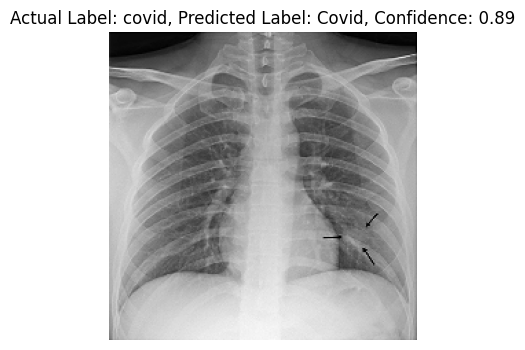

In [11]:
test_image = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0111.jpg'
prediction(test_image, actual_label='covid')
